### Import relevant libraries

In [59]:
from semopy import Model, calc_stats, semplot
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import seaborn as sns
from semopy.inspector import inspect

### Import the dataset

In [60]:
df = pd.read_csv("Welzijnsmonitor2025_scaled_normalised_UTF8.csv", sep=";")

### Creating the model

In [ ]:
model_desc = """
# measurement model

Wellbeing =~ Bevl_1 + Bevl_2 + Bevl_3 + Cogn_Eng1_5 + Cogn_Eng1_6 + Cogn_Eng2_2 + Cogn_Eng2_3 + Cogn_Eng2_8 + Mot_Stress_1 + Mot_Stress_4
Energy_Sources =~ Bekendgebruik_1 + Bekendgebruik_2 + Bekendgebruik_3 + Bekendgebruik_4 + Bekendgebruik_5 + Bekendgebruik_6 + Bekendgebruik_7 + Cogn_Eng1_1 + Cogn_Eng1_2 + Cogn_Eng1_3 + Cogn_Eng1_4 + Cogn_Eng2_1 + Cogn_Eng2_4 + Cogn_Eng2_5 + Cogn_Eng2_6 + Cogn_Eng2_7 + Hulp_1 + Hulp_2 + Hulp_3 + Partici1_1 + Partici1_2 + Partici1_3 + Partici1_4 + Betrok_Ouders
Negative_Outcomes =~ StopInt + Vertr
Positive_Outcomes =~ Cijfer_huidig_1 + Stopint2
Stressors =~ Cantrill_1 + Leefst + Q297_1 + Onnodige_stress_1 + Onnodige_stress_2 + Onnodige_stress_3 + Onnodige_stress_4 + Onnodige_stress_5 + Onnodige_stress_6 + Onnodige_stress_7 + Onnodige_stress_8 + Onnodige_stress_9 + Onnodige_stress_10 + Werk_1
Response_to_Stress =~ Burn1_1 + Burn1_2 + Burn1_3 + Burn1_4 + Depr_1 + Depr_2 + Depr_3 + Depr_4 + Depr_5 + Depr_6 + Depr_7 + Depr_8 + Mot_Stress_2

# Covariances (two-headed arrows in the diagram)
Stressors ~~ Energy_Sources
Response_to_Stress ~~ Wellbeing

# Regressions
Response_to_Stress ~ Stressors + Energy_Sources
Wellbeing ~ Stressors + Energy_Sources

Negative_Outcomes ~ Response_to_Stress + Wellbeing
Positive_Outcomes ~ Wellbeing + Response_to_Stress
"""

In [62]:
model = Model(model_desc)
model.fit(df)

df_imputed = model.predict(df)
latent_scores = model.predict_factors(df_imputed)

# Export the model with the new latent variables and their descriptive statistics

In [63]:
latent_scores.to_csv("latent_variable_scores.csv", index=False)
latent_scores.describe()

,Energy_Sources,Negative_Outcomes,Positive_Outcomes,Response_to_Stress,Stressors,Wellbeing
count,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03
mean,1.386310e-16,5.874196e-19,9.031576e-17,-7.049035e-17,1.362813e-16,1.785756e-16
std,2.245259e-01,2.004906e-01,9.899154e-02,5.958841e-01,6.014289e-01,5.319354e-01
min,-8.970996e-01,-4.479533e-01,-4.016922e-01,-1.485897e+00,-1.535953e+00,-2.154600e+00
25%,-1.450957e-01,-1.448720e-01,-5.197375e-02,-4.464208e-01,-4.237327e-01,-2.818665e-01
50%,-1.978147e-03,-4.691396e-02,1.491957e-02,-4.533320e-02,2.089334e-02,8.205134e-02
75%,1.384407e-01,1.094366e-01,6.550558e-02,3.911478e-01,4.454916e-01,3.501774e-01
max,8.259193e-01,8.356935e-01,2.524248e-01,2.115080e+00,1.468100e+00,1.362652e+00


In [64]:
latents = set(model.vars['latent'])
observeds = set(model.vars['observed'])

est = model.inspect(std_est=True)

# Factor loadings = observed ~ latent
loadings = est[
    (est['op'] == '~') &
    (est['lval'].isin(observeds)) &
    (est['rval'].isin(latents))
]

print("Factor loadings:")
display(loadings)

Factor loadings:


,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
8,Bevl_1,~,Wellbeing,1.000000,0.649604,-,-,-
9,Bevl_2,~,Wellbeing,1.151579,0.787046,0.044227,26.038199,0.0
10,Bevl_3,~,Wellbeing,1.087236,0.678948,0.047078,23.094466,0.0
11,Cogn_Eng1_5,~,Wellbeing,1.232084,0.725739,0.050489,24.403091,0.0
12,Cogn_Eng1_6,~,Wellbeing,0.989986,0.591476,0.04824,20.521967,0.0
13,Cogn_Eng2_2,~,Wellbeing,0.812799,0.435281,0.052242,15.558331,0.0
14,Cogn_Eng2_3,~,Wellbeing,0.683956,0.389668,0.048754,14.028702,0.0
15,Cogn_Eng2_8,~,Wellbeing,0.774986,0.469365,0.046465,16.678994,0.0
16,Mot_Stress_1,~,Wellbeing,1.161043,0.750336,0.046311,25.070617,0.0
17,Mot_Stress_4,~,Wellbeing,1.221863,0.825684,0.045233,27.012646,0.0


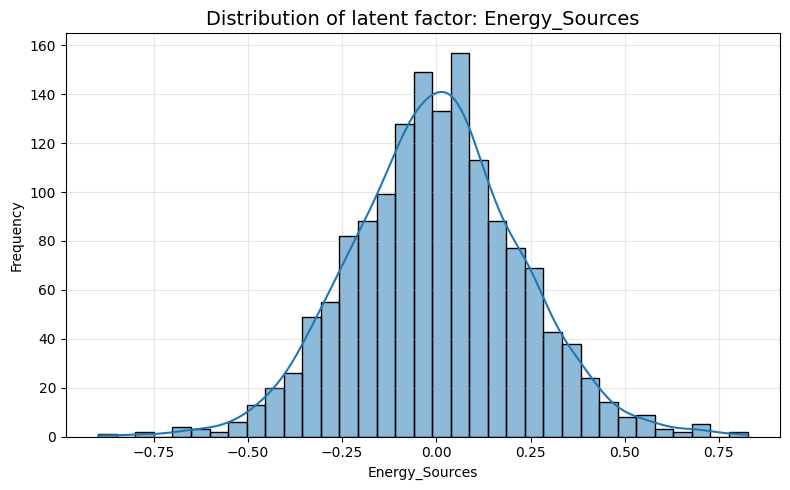

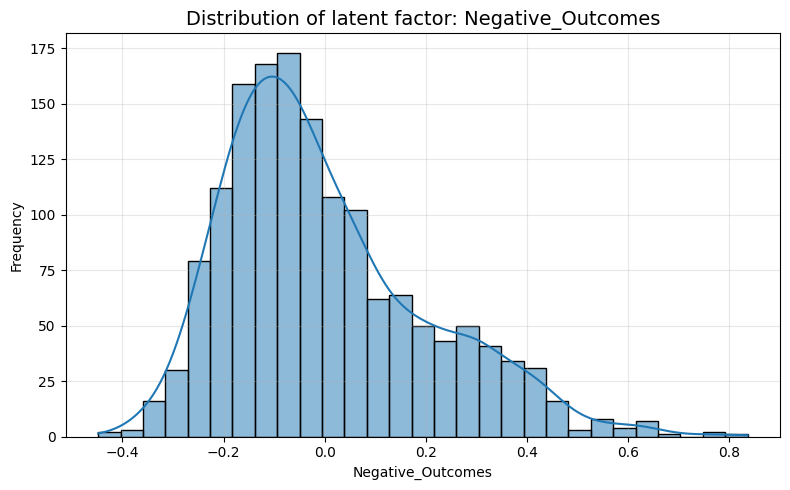

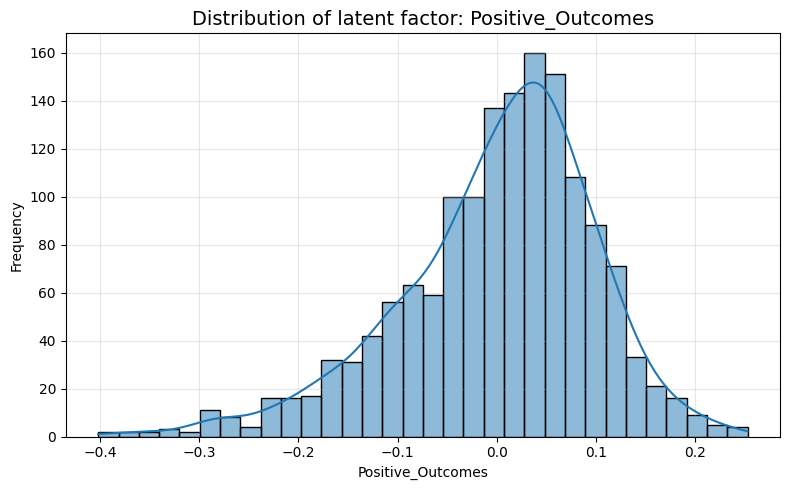

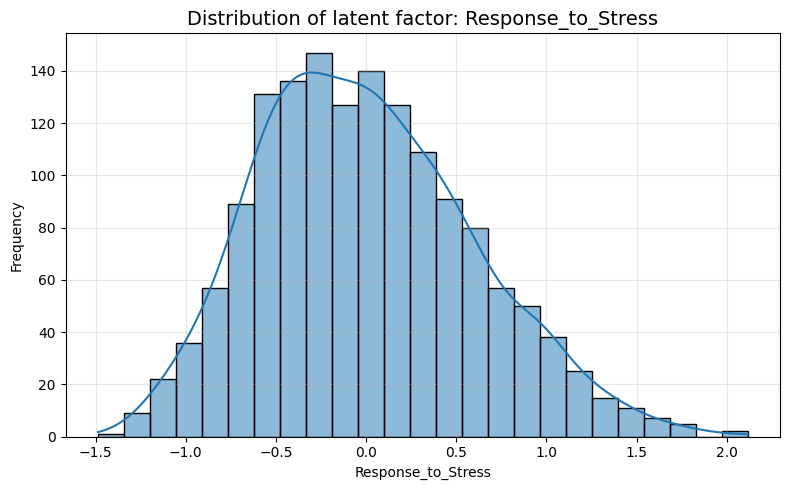

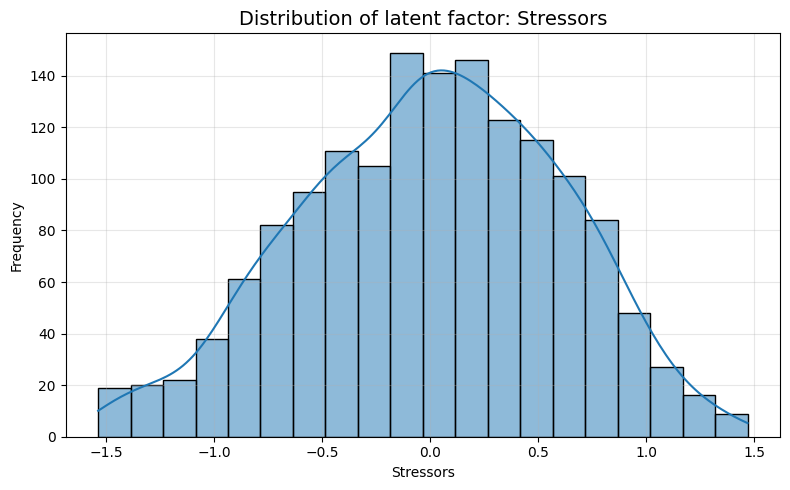

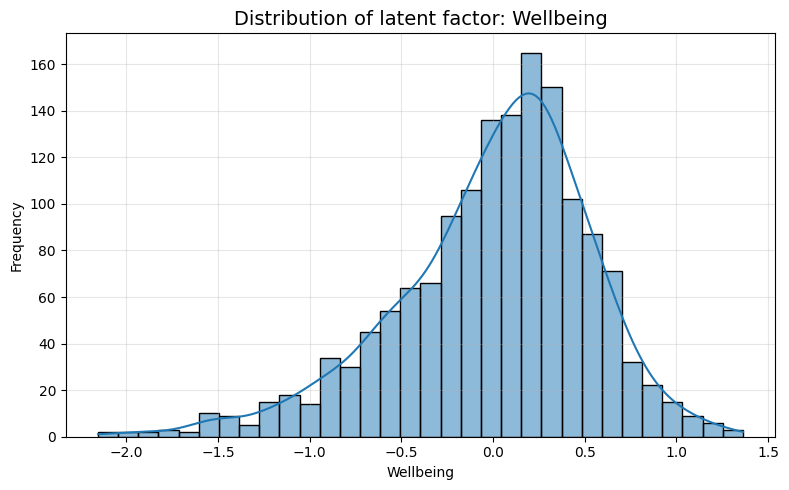

In [65]:
# Plot histogram for each latent variable
for col in latent_scores.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(latent_scores[col], kde=True)
    plt.title(f"Distribution of latent factor: {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Correlation matrix

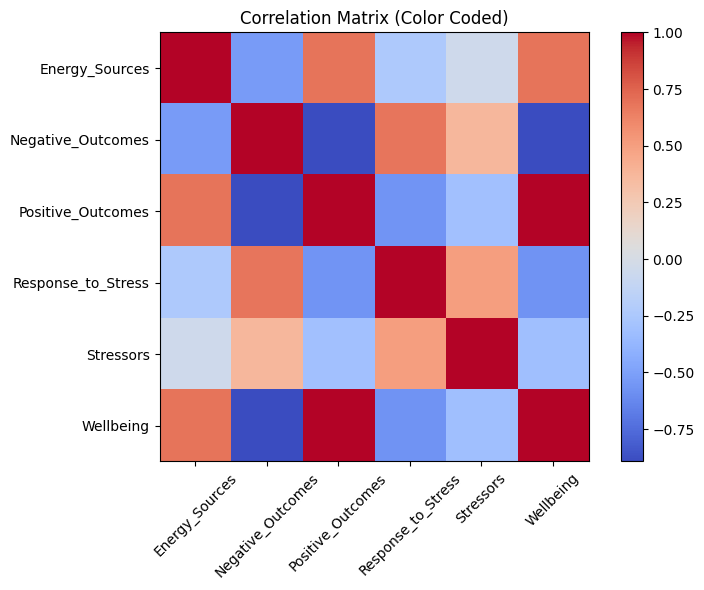

In [66]:
corr_matrix = latent_scores.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, interpolation='nearest', cmap='coolwarm')
plt.title("Correlation Matrix (Color Coded)")
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

# print(corr_matrix)

### Calculate fit indices

In [67]:
stats = calc_stats(model)

print("=== Model Fit Statistics ===")
print(stats.T)

=== Model Fit Statistics ===
                      Value
DoF             1700.000000
DoF Baseline    1770.000000
chi2           14155.372708
chi2 p-value       0.000000
chi2 Baseline  34017.284150
CFI                0.613754
GFI                0.583877
AGFI               0.566743
NFI                0.583877
TLI                0.597850
RMSEA              0.069634
AIC              241.275962
BIC              933.030474
LogLik             9.362019


### Create and save the path diagram

In [68]:
g = semplot(model, "pd3.png")

### Extract model coefficients

In [69]:
coefficients = model.inspect()
coefficients.to_csv("model_coefficients.csv")
coefficients.to_excel("model_coefficients.xlsx")

In [70]:
def pretty_sem_latent_explicit(model):
    df = model.inspect().copy()

    # List of latent relationships as (lval, op, rval)
    wanted = [
        # covariances
        ("Stressors",          "~~", "Energy_Sources"),
        ("Response_to_Stress", "~~", "Wellbeing"),

        # regressions
        ("Response_to_Stress", "~",  "Stressors"),
        ("Response_to_Stress", "~",  "Energy_Sources"),
        ("Wellbeing",          "~",  "Stressors"),
        ("Wellbeing",          "~",  "Energy_Sources"),
        ("Negative_Outcomes",  "~",  "Response_to_Stress"),
        ("Negative_Outcomes",  "~",  "Wellbeing"),
        ("Positive_Outcomes",  "~",  "Response_to_Stress"),
        ("Positive_Outcomes",  "~",  "Wellbeing"),
    ]

    wanted_df = pd.DataFrame(wanted, columns=["lval", "op", "rval"])

    # Inner join to keep only those rows
    df = df.merge(wanted_df, on=["lval", "op", "rval"], how="inner")

    # Label type + from/to
    df["Type"] = df["op"].map({"~": "Regression", "~~": "Covariance"})
    df["From"] = df["lval"]
    df["To"]   = df["rval"]

    # Clean p-values (handles "<0.001")
    p_clean = df["p-value"].astype(str).str.replace("<", "", regex=False)
    df["p_value"] = pd.to_numeric(p_clean, errors="coerce")

    # Significance stars
    def stars(p):
        if pd.isna(p): return ""
        if p < 0.001: return "***"
        if p < 0.01:  return "**"
        if p < 0.05:  return "*"
        if p < 0.10:  return "."
        return ""

    df["Sig"] = df["p_value"].apply(stars)

    # Numeric & rounded
    for col in ["Estimate", "Std. Err", "z-value", "p_value"]:
        df[col] = pd.to_numeric(df[col], errors="coerce").round(4)

    # Final table
    nice = df[[
        "Type", "From", "To",
        "Estimate", "Std. Err", "z-value", "p_value", "Sig"
    ]].copy()

    nice = nice.rename(columns={"Std. Err": "Std_Err"})

    return nice

latent_table = pretty_sem_latent_explicit(model)
latent_table   # last line in the cell → shows a nice table

,Type,From,To,Estimate,Std_Err,z-value,p_value,Sig
0,Regression,Response_to_Stress,Stressors,0.4404,0.0346,12.7233,0.0000,***
1,Regression,Response_to_Stress,Energy_Sources,-0.4605,0.0955,-4.8202,0.0000,***
2,Regression,Wellbeing,Stressors,-0.2252,0.0244,-9.2430,0.0000,***
3,Regression,Wellbeing,Energy_Sources,1.3295,0.1906,6.9758,0.0000,***
4,Regression,Negative_Outcomes,Response_to_Stress,0.0841,0.0186,4.5166,0.0000,***
5,Regression,Negative_Outcomes,Wellbeing,-0.2783,0.0232,-12.0133,0.0000,***
6,Regression,Positive_Outcomes,Wellbeing,0.1873,0.0264,7.0887,0.0000,***
7,Regression,Positive_Outcomes,Response_to_Stress,0.0019,0.0157,0.1202,0.9043,
8,Covariance,Stressors,Energy_Sources,-0.0035,0.0049,-0.7289,0.4661,
9,Covariance,Response_to_Stress,Wellbeing,-0.1045,0.0095,-11.0500,0.0000,***
